In [13]:
%cd /storage/lab/solar-energy-prediction/

/storage/lab/solar-energy-prediction


In [14]:
import pandas as pd
paris = pd.read_csv("data/raw/weather/paris_hourly.csv")
paris.columns

Index(['datetime', 'timestamp', 'station', 'station_name',
       'direct_normal_irradiance', 'cloud_cover', 'sunshine_duration',
       'precipitation', 'surface_pressure', 'relative_humidity_2m',
       'temperature_2m', 'wind_speed_10m', 'shortwave_radiation'],
      dtype='object')

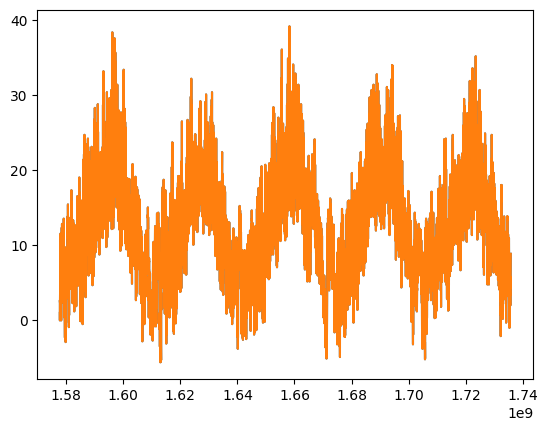

In [15]:
import matplotlib.pyplot as plt
from src.collect_data.timeutils import date_to_int
t = map(lambda x: date_to_int(x),paris['datetime'])
t = list(t)
plt.plot(t, paris["temperature_2m"])
plt.plot(t, paris["temperature_2m"])

In [16]:
time = paris['datetime']
time.head()

0    2020-01-01 00:00:00
1    2020-01-01 01:00:00
2    2020-01-01 02:00:00
3    2020-01-01 03:00:00
4    2020-01-01 04:00:00
Name: datetime, dtype: object

Text(0.5, 1.0, 'Energy Production Over Time')

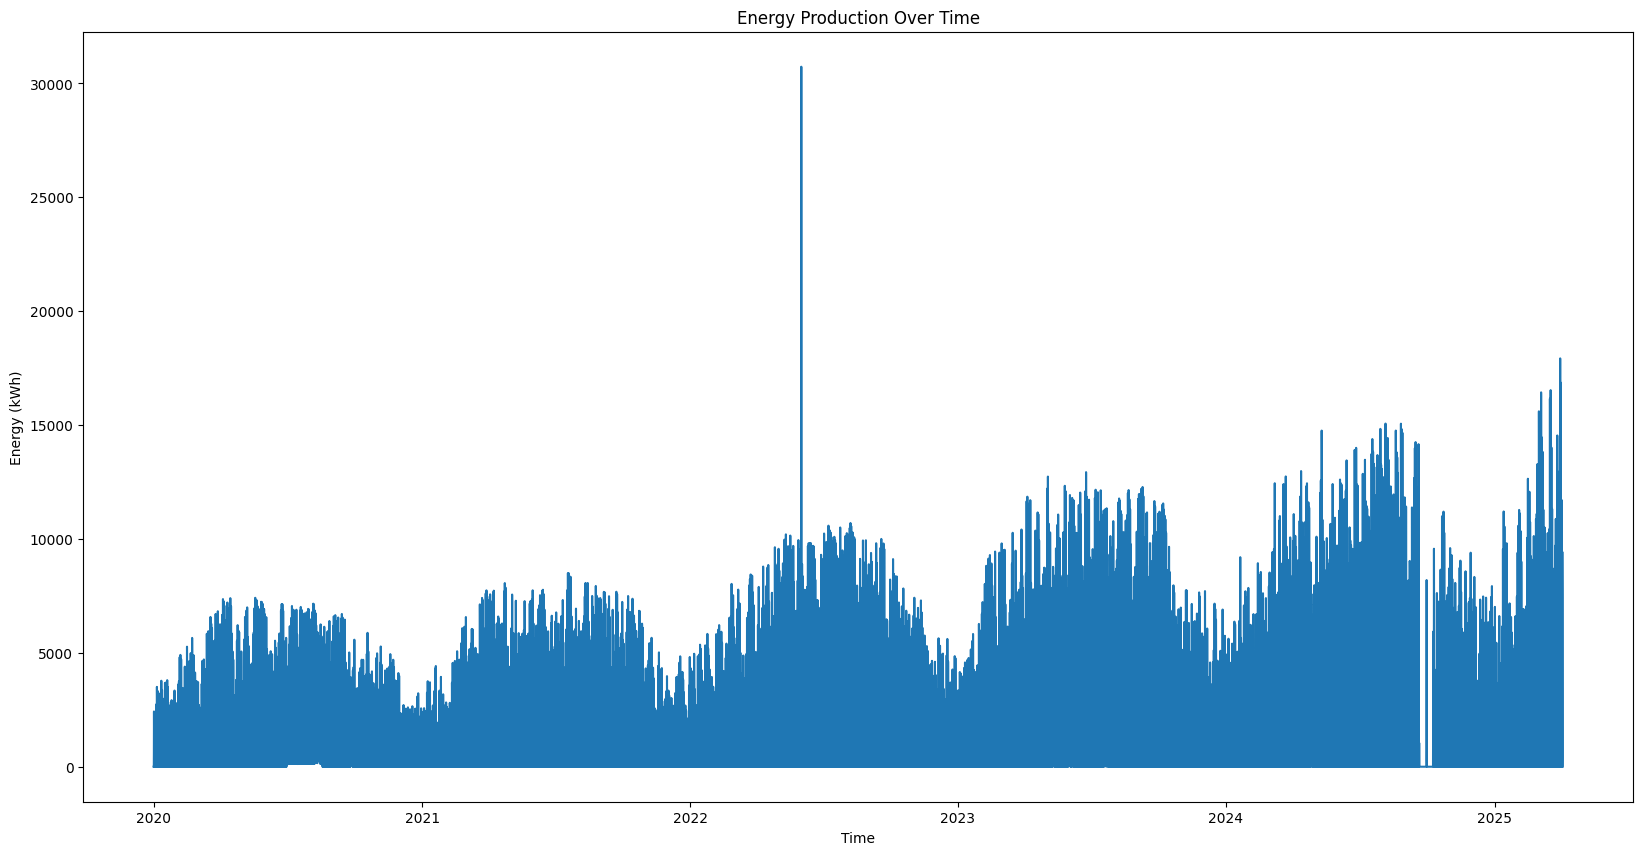

In [17]:
from datetime import datetime
import zoneinfo
import pandas as pd
import os
import numpy as np

from src.collect_data.timeutils import int_to_date

data = pd.read_csv("data/energy/SOLAR.csv")

time_energy = data['start'].apply(lambda x: datetime.fromtimestamp(
    x, tz=zoneinfo.ZoneInfo('Europe/Paris')))
time_energy.head()

plt.figure(figsize=(20,10))
plt.plot(time_energy, data['values'])
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.title('Energy Production Over Time')


Index(['datetime', 'timestamp', 'station', 'station_name',
       'direct_normal_irradiance', 'cloud_cover', 'sunshine_duration',
       'precipitation', 'surface_pressure', 'relative_humidity_2m',
       'temperature_2m', 'wind_speed_10m', 'shortwave_radiation'],
      dtype='object')


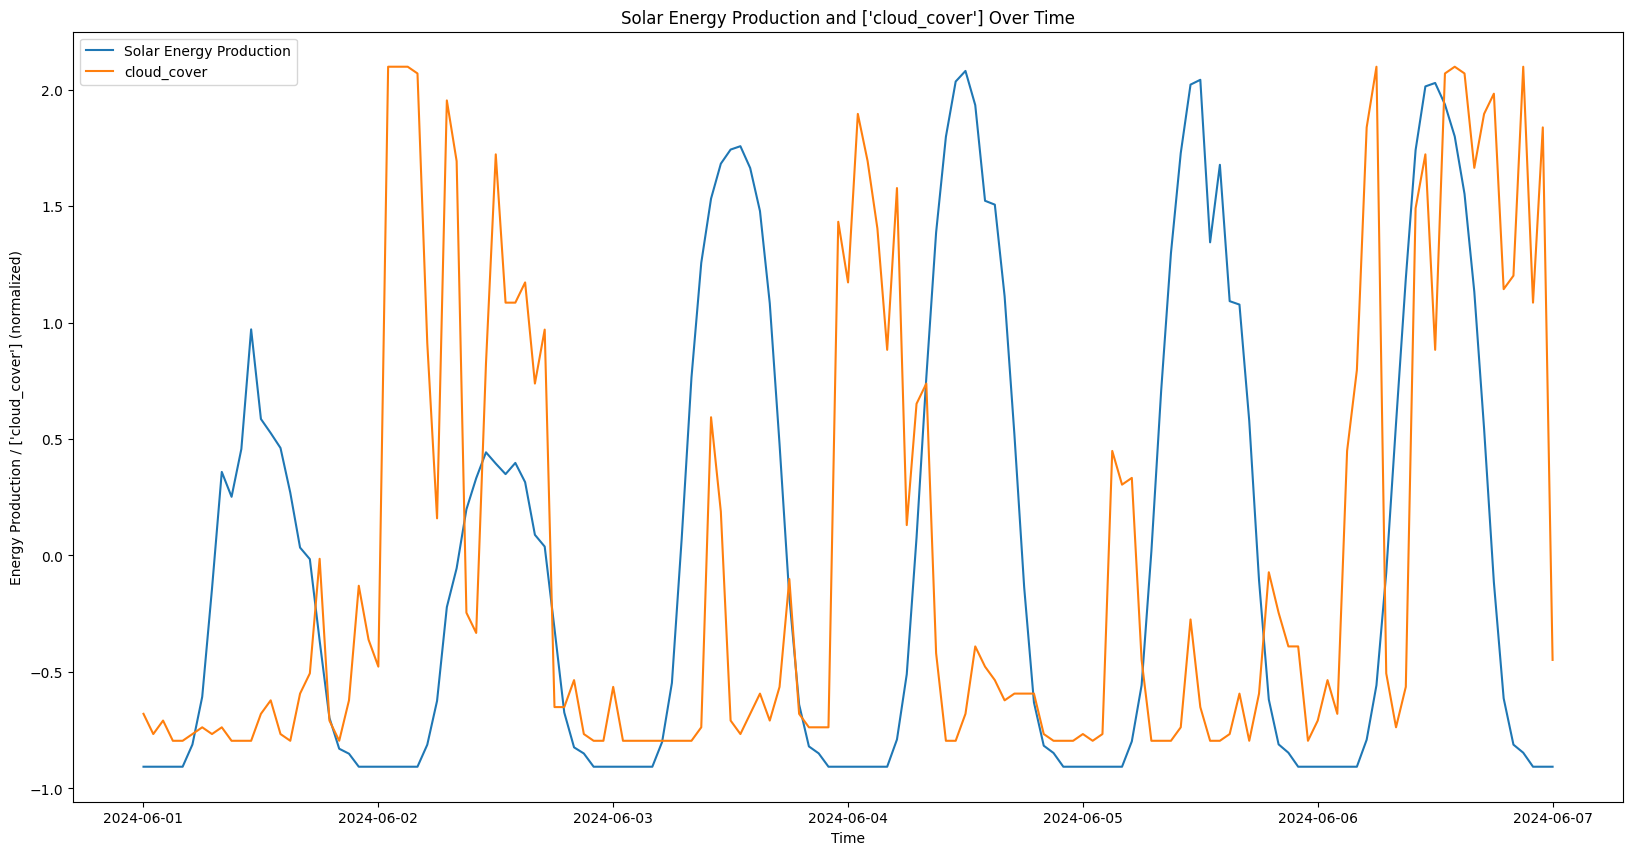

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

solar = pd.read_csv("data/energy/SOLAR.csv")
weather = pd.read_csv("data/raw/weather/marseille_hourly.csv")

# create a new column datetime in the solar DataFrame
# solar['start'] += 3600
solar['datetime'] = pd.to_datetime(solar['start'], unit='s')
weather['datetime'] = pd.to_datetime(weather['datetime'])
print(weather.columns)

# Merge the two DataFrames on the 'start' and 'datetime' columns
merged_df = pd.merge_asof(
    weather.sort_values('datetime'),
    solar.sort_values('start'),
    left_on='timestamp',
    right_on='start',
    direction='nearest')

predictors = ["cloud_cover"]
fused_dataframe = merged_df[['start', 'values', *predictors]]
start_date = pd.to_datetime("2024-06-01")
end_date = pd.to_datetime("2024-06-07")
fused_dataframe = fused_dataframe[(fused_dataframe['start'] >= start_date.timestamp()) & 
                                    (fused_dataframe['start'] <= end_date.timestamp())]
plt.figure(figsize=(20, 10))
fused_dataframe['start'] = pd.to_datetime(fused_dataframe['start'], unit='s')
# Normalize values and temperature_2m for better visualization
fused_dataframe['values'] = (fused_dataframe['values'] -
                             fused_dataframe['values'].mean()) / (fused_dataframe['values'].std())
fused_dataframe[predictors] = (fused_dataframe[predictors] -
                              fused_dataframe[predictors].mean()) / (fused_dataframe[predictors].std())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.plot(fused_dataframe['start'], fused_dataframe['values'],
         label='Solar Energy Production')
for predictor in predictors:
    if predictor in fused_dataframe.columns:
        # Plot each predictor
        plt.plot(fused_dataframe['start'], fused_dataframe[predictor],
                 label=predictor)
# plt.plot(fused_dataframe['start'], fused_dataframe[predictors],
#          label=predictors, color='orange')
plt.xlabel("Time")
plt.ylabel(f"Energy Production / {predictors} (normalized)")
plt.legend()
plt.title(f"Solar Energy Production and {predictors} Over Time")
plt.show()